In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv("titanic_train.csv")

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory Data Analysis:

Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data:

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

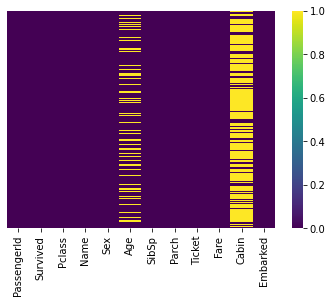

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="viridis")


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

C:\Users\PRANEE~1\AppData\Local\Temp/ipykernel_8452/1019834150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train,y="Survived",palette="RdBu_r")


<Axes: xlabel='count', ylabel='Survived'>

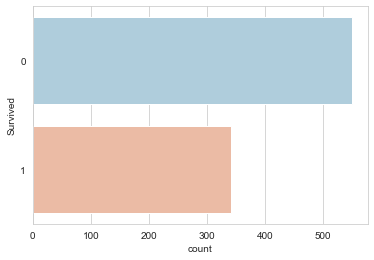

In [8]:
sns.set_style("whitegrid")
sns.countplot(data= train,y="Survived",palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

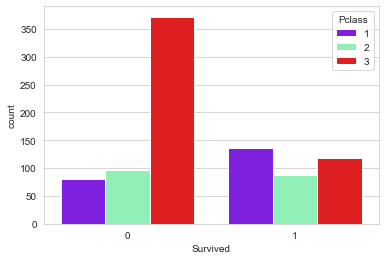

In [9]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

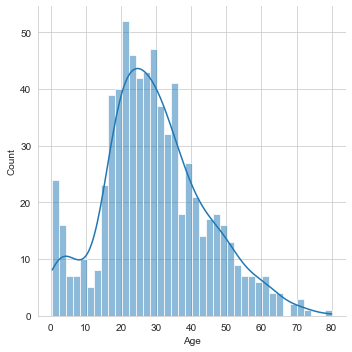

In [10]:
sns.displot(train["Age"].dropna(),bins=40,kde=True)

<Axes: >

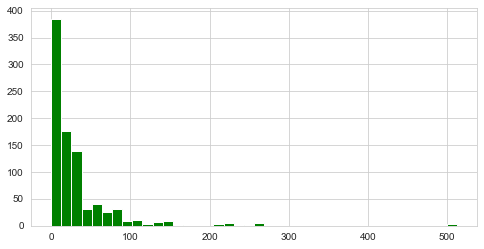

In [11]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Cufflinks for plots:
Let's take a quick moment to show an example of cufflinks!

Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:


C:\Users\PRANEE~1\AppData\Local\Temp/ipykernel_8452/2249213625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

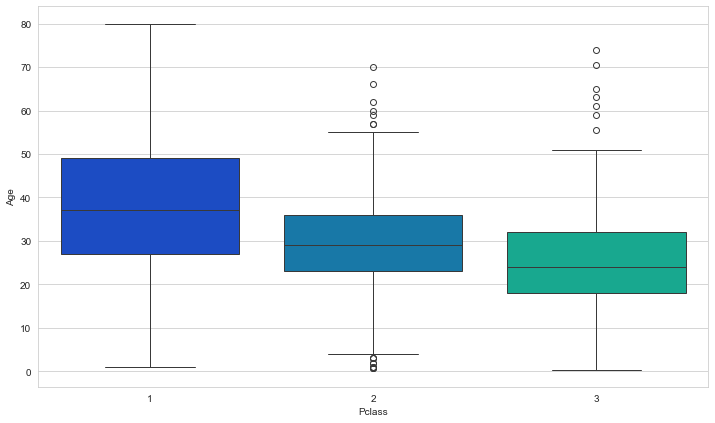

In [12]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')



In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

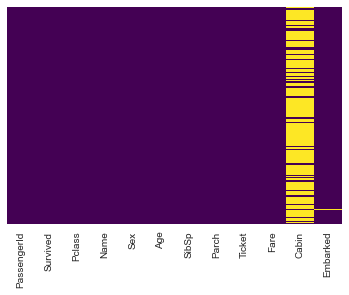

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Data Cleaning:

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

In [17]:
import matplotlib.pyplot as plt


<Axes: xlabel='Pclass', ylabel='Age'>

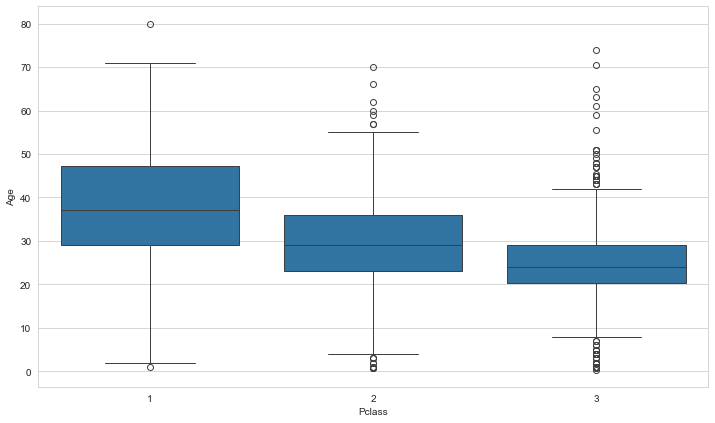

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

Converting Categorical Features:

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [20]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
sex =pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [25]:
train = pd.concat([train,sex,embark],axis=1)

Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training)


In [30]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,0,0
2,3,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,35.0,1,0,53.1000,C123,0,0,1
4,5,3,35.0,0,0,8.0500,NaN,1,0,1


In [31]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#Training and Predicting

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
value = 'B73'

try:
    float_value = float(value)
    print(float_value)
except ValueError:
    print("Cannot convert '{}' to float.".format(value))


Cannot convert 'B73' to float.


In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'B73'